# Declare paths

In [1]:
import os
import wget
import zipfile


dataset = 'cough_samples'
data_dir = os.path.join('datasets', dataset)
train_dir = os.path.join(data_dir,'train','aicv115m_train')
wav_train_dir = os.path.join(train_dir,'train_audio_files_8k','train_audio_files_8k')

test_dir = os.path.join(data_dir,'test','aicv115m_test')
wav_test_dir = os.path.join(test_dir,'public_test_audio_files_8k','public_test_audio_files_8k')

# if not os.path.exists(data_dir):
#    os.makedirs(data_dir)
# !cd ./datasets/cough_samples

# if not os.path.exists('datasets/cough_samples/train.zip'):
#     wget.download(
#         'https://drive.google.com/file/d/1MPhz3zYl2yefCq-J5XySbFJt99BfKIZD/view',
#         os.path.join(data_dir, 'train.zip'))
# if not os.path.exists('datasets/cough_samples/test.zip'):
#     wget.download(
#         'https://drive.google.com/file/d/1UrMudzopA3CyR1Ih2J63Kfi2mY_0uhRK/view',
#         os.path.join(data_dir, 'test.zip'))

# def maybe_unzip(zip_filepath, destination_dir, force=False):
# #     try:
#     print('Extracting zip file: ' + os.path.split(zip_filepath)[-1])
#     with zipfile.ZipFile(zip_filepath) as zf:
#         zf.extractall(destination_dir)
#     print("Extraction complete!")    
# #     except:
# #         print("not a zip file")

# maybe_unzip(os.path.join(data_dir, 'train.zip'), data_dir)
# maybe_unzip(os.path.join(data_dir, 'test.zip'), data_dir)

# Audio Preprocessing

In [4]:
import librosa
import matplotlib.pyplot as plt
audio_path = os.path.join(wav_train_dir,'001ba082-6316-4caa-b94e-df5e1ef7141c.wav')
wav, sr = librosa.load(audio_path)

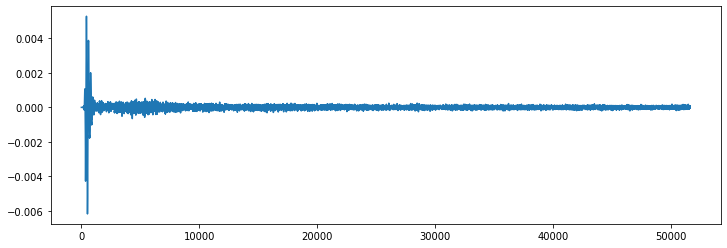

In [5]:
plt.figure(figsize=(12,4))
plt.plot(wav)

In [6]:
mfccs = librosa.feature.mfcc(y=wav,sr=sr,n_mfcc=40)
print(mfccs.shape)

(40, 101)


In [7]:
mfccs


array([[-7.2229358e+02, -7.2227356e+02, -7.5426910e+02, ...,
        -8.1642401e+02, -8.1720258e+02, -8.2339545e+02],
       [ 2.1603046e+02,  2.1686554e+02,  1.9492297e+02, ...,
         1.3662039e+02,  1.3398473e+02,  1.3253049e+02],
       [-2.0229725e+01, -1.7771343e+01, -1.5889421e+01, ...,
        -3.8920818e+01, -4.3690472e+01, -4.0768578e+01],
       ...,
       [-4.1536579e+00, -5.0077972e+00, -3.9944534e+00, ...,
        -1.6874545e+00, -1.3899126e+00,  3.1983018e+00],
       [ 2.5991559e-01, -2.1073270e-01,  2.0556841e+00, ...,
         5.6768379e+00,  4.4596720e+00,  5.3287954e+00],
       [-9.6807337e-01, -1.3229702e+00,  6.4763212e-01, ...,
         5.6712203e+00,  5.9646969e+00,  2.6138356e+00]], dtype=float32)

In [9]:
# extract MFCC from every audio files
import pandas as pd
import os
import librosa

metadata = pd.read_csv(os.path.join(train_dir,'metadata_train_challenge.csv'))
metadata #or metadata.head() to see the data

,uuid,subject_gender,subject_age,assessment_result,file_path
0,3284bcf1-2446-4f3a-ac66-14c76b294177,male,23.0,0,3284bcf1-2446-4f3a-ac66-14c76b294177.wav
1,431334e1-5946-4576-bb51-8e342ccc22b4,NaN,NaN,0,431334e1-5946-4576-bb51-8e342ccc22b4.wav
2,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1,NaN,NaN,0,1d6fac4b-1e7f-4bdc-81cd-3a720bfbb1e1.wav
3,c7ee0695-b2e7-4beb-b904-f1455c9609d9,male,49.0,0,c7ee0695-b2e7-4beb-b904-f1455c9609d9.wav
4,dd541704-b696-4181-8fd8-816daac0fcf9,NaN,NaN,0,dd541704-b696-4181-8fd8-816daac0fcf9.wav
...,...,...,...,...,...
1194,92a5ec05-648d-4c3b-b7b0-a3b40929d0df,NaN,NaN,0,92a5ec05-648d-4c3b-b7b0-a3b40929d0df.wav
1195,665fa66c-f6dc-4d30-b4ec-09aae303d307,NaN,NaN,0,665fa66c-f6dc-4d30-b4ec-09aae303d307.wav
1196,c2039c0d-b32c-4843-a551-29cf660acd12,male,52.0,0,c2039c0d-b32c-4843-a551-29cf660acd12.wav
1197,ee6711e1-55df-469c-9296-ee9dc242a247,female,23.0,1,ee6711e1-55df-469c-9296-ee9dc242a247.wav


In [10]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [12]:
from tqdm import tqdm

audio_path = os.path.join(wav_train_dir,'001ba082-6316-4caa-b94e-df5e1ef7141c.wav')
tqdm(metadata.iterrows())
os.path.abspath(wav_train_dir)

0it [00:00, ?it/s]

'C:\\Users\\badun\\OneDrive - Monash University\\pyCharm project\\COVID_detector\\datasets\\cough_samples\\train\\aicv115m_train\\train_audio_files_8k\\train_audio_files_8k'

In [13]:
import numpy as np
from tqdm import tqdm

# go through each file and extract features
# use MFCC (mel-freq cepstral coef)
extracted_features = []
for i, r in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(wav_train_dir),str(r["file_path"]))
    final_labels = r["assessment_result"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_labels])
extracted_features


0it [00:00, ?it/s]
0it [00:02, ?it/s]t/s]

6it [00:00, 17.84it/s]
9it [00:00, 19.77it/s]
12it [00:00, 20.99it/s]
15it [00:00, 20.85it/s]
18it [00:00, 19.91it/s]
22it [00:01, 23.55it/s]
25it [00:01, 20.76it/s]
28it [00:01, 19.86it/s]
31it [00:01, 20.70it/s]
34it [00:01, 22.36it/s]
37it [00:01, 22.93it/s]
40it [00:01, 21.63it/s]
43it [00:02, 21.16it/s]
46it [00:02, 19.70it/s]
49it [00:02, 20.81it/s]
52it [00:02, 20.95it/s]
55it [00:02, 21.76it/s]
59it [00:02, 24.00it/s]
62it [00:02, 24.90it/s]
65it [00:02, 25.74it/s]
68it [00:03, 24.53it/s]
71it [00:03, 24.55it/s]
74it [00:03, 22.06it/s]
77it [00:03, 22.37it/s]
80it [00:03, 23.78it/s]
83it [00:03, 21.43it/s]
86it [00:03, 22.46it/s]
89it [00:04, 20.81it/s]
92it [00:04, 20.23it/s]
95it [00:04, 21.45it/s]
98it [00:04, 20.42it/s]
101it [00:04, 20.04it/s]
104it [00:04, 20.89it/s]
107it [00:04, 22.21it/s]
110it [00:05, 22.34it/s]
113it [00:05, 23.00it/s]
116it [00:05, 21.87it/s]
119it [00:05, 22.88it/s]
122it [00:05, 24.27it/s]
125it [00:05, 

898it [00:41, 20.98it/s]
901it [00:41, 21.07it/s]
904it [00:41, 21.17it/s]
907it [00:41, 20.55it/s]
910it [00:41, 22.53it/s]
913it [00:41, 22.85it/s]
916it [00:41, 20.65it/s]
919it [00:42, 21.83it/s]
922it [00:42, 21.99it/s]
925it [00:42, 23.46it/s]
928it [00:42, 24.19it/s]
931it [00:42, 22.70it/s]
935it [00:42, 25.86it/s]
938it [00:42, 26.37it/s]
941it [00:42, 22.13it/s]
944it [00:43, 22.79it/s]
947it [00:43, 21.17it/s]
950it [00:43, 20.85it/s]
953it [00:43, 21.11it/s]
956it [00:43, 22.83it/s]
959it [00:43, 22.90it/s]
962it [00:43, 22.80it/s]
965it [00:44, 22.22it/s]
968it [00:44, 23.14it/s]
971it [00:44, 23.12it/s]
974it [00:44, 22.53it/s]
977it [00:44, 19.66it/s]
980it [00:44, 20.79it/s]
983it [00:44, 22.58it/s]
986it [00:44, 23.64it/s]
989it [00:45, 22.72it/s]
992it [00:45, 22.02it/s]
995it [00:45, 21.84it/s]
998it [00:45, 20.85it/s]
1001it [00:45, 22.33it/s]
1004it [00:45, 20.06it/s]
1007it [00:45, 22.18it/s]
1010it [00:46, 21.85it/s]
1013it [00:46, 22.01it/s]
1016it [00:46, 20.47

[[array([-4.9638177e+02,  9.3876740e+01, -2.4463970e+01, -9.4101725e+00,
          6.5959253e+00, -1.8293610e+01, -1.7237606e+01, -1.2841071e+01,
         -8.5198040e+00,  9.2254972e+00,  1.0610915e+00, -1.4253069e+01,
         -1.7806147e+00,  1.5670487e+00, -8.7125750e+00, -4.9201450e+00,
         -2.3835449e+00, -5.7300525e+00, -3.9593315e+00, -5.3993845e+00,
         -5.6475549e+00, -1.9276313e+00, -5.1486106e+00, -5.5815558e+00,
          1.2387311e-01, -1.7579039e+00, -4.5163932e+00, -2.5005171e+00,
         -3.3591745e+00, -2.4955044e+00,  5.9484720e-02, -2.4751422e+00,
         -3.3660066e+00, -1.4451994e+00, -2.4984877e+00, -2.4819248e+00,
         -1.2407165e+00, -1.6950120e+00, -8.5445350e-01, -7.2231781e-01],
        dtype=float32),
  0],
 [array([-9.0109857e+02,  1.3056163e+02, -3.4279255e+01, -3.9003246e+00,
          1.7621975e+01, -2.3469172e+01, -6.3814068e+00,  1.0368768e+01,
         -1.0897435e+01, -3.4846554e+00,  5.3320456e+00, -7.1661863e+00,
         -1.8935103e

In [14]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['audio','assessment result'])
extracted_features_df

,audio,assessment result
0,"[-496.38177, 93.87674, -24.46397, -9.410172, 6...",0
1,"[-901.0986, 130.56163, -34.279255, -3.9003246,...",0
2,"[-568.3273, 35.619583, 9.56859, 8.829246, 7.59...",0
3,"[-433.27594, 99.01472, -24.024174, -7.366857, ...",0
4,"[-628.8891, 169.29625, -7.4066076, 16.290413, ...",0
...,...,...
1194,"[-664.2149, 37.390343, -4.673376, 5.82194, 10....",0
1195,"[-518.4182, 61.662495, -5.102059, 2.334179, 10...",0
1196,"[-517.79, 18.809172, -16.19104, -6.389179, 0.2...",0
1197,"[-573.44885, 53.851818, -13.378386, -6.4003315...",1


In [15]:
# split dataset into features and labels
x = np.array(extracted_features_df['audio'].tolist())
y= np.array(extracted_features_df['assessment result'].tolist())


In [16]:
x.shape


(1199, 40)

In [21]:
### Label Encoding
y=np.array(pd.get_dummies(y))
y.shape

(1199, 2)

In [27]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape

(959, 40)

In [30]:
y_train.shape

(959, 2)

In [32]:
X_test.shape

(240, 40)

In [18]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [22]:
num_labels = y.shape[1]

In [24]:
model= Sequential()
# first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
# train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
import os

num_epochs = 100
num_batch_size = 32

saved_models= 'save_models'

if not os.path.exists(saved_models):
    os.makedirs(saved_models)
checkpointer = ModelCheckpoint(filepath=os.path.join(saved_models,'cough_classification.hdf5'),
                              verbose=1,
                              save_best_only=True)
start = datetime.now()

model.fit(X_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test,y_test), callbacks=[checkpointer],verbose=1)

duration = datetime.now()-start
print("training completed in time: ",duration)

Epoch 1/100
 1/30 [>.............................] - ETA: 0s - loss: 79.2891 - accuracy: 0.5312
Epoch 00001: val_loss improved from inf to 3.54675, saving model to save_models\cough_classification.hdf5
30/30 [==============================] - 0s 11ms/step - loss: 32.6629 - accuracy: 0.5589 - val_loss: 3.5468 - val_accuracy: 0.5708
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 16.3069 - accuracy: 0.5000
Epoch 00002: val_loss did not improve from 3.54675
30/30 [==============================] - 0s 1ms/step - loss: 18.1409 - accuracy: 0.5297 - val_loss: 3.9862 - val_accuracy: 0.5708
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 11.2757 - accuracy: 0.6562
Epoch 00003: val_loss improved from 3.54675 to 0.83905, saving model to save_models\cough_classification.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 11.7319 - accuracy: 0.5276 - val_loss: 0.8391 - val_accuracy: 0.5083
Epoch 4/100
 1/30 [>.............................] - E

Epoch 30/100
 1/30 [>.............................] - ETA: 0s - loss: 0.8614 - accuracy: 0.5312
Epoch 00030: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.7357 - accuracy: 0.6006 - val_loss: 0.6833 - val_accuracy: 0.5708
Epoch 31/100
 1/30 [>.............................] - ETA: 0s - loss: 0.8141 - accuracy: 0.5625
Epoch 00031: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.7320 - accuracy: 0.6058 - val_loss: 0.6832 - val_accuracy: 0.5708
Epoch 32/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7496 - accuracy: 0.5938
Epoch 00032: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.6048 - val_loss: 0.6831 - val_accuracy: 0.5708
Epoch 33/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7815 - accuracy: 0.6250
Epoch 00033: val_loss did not improve from 0.68232
30/30 [==================

Epoch 60/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7229 - accuracy: 0.5938
Epoch 00060: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.6173 - val_loss: 0.6870 - val_accuracy: 0.5708
Epoch 61/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7038 - accuracy: 0.5312
Epoch 00061: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6225 - val_loss: 0.6877 - val_accuracy: 0.5708
Epoch 62/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6755 - accuracy: 0.6250
Epoch 00062: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6142 - val_loss: 0.6879 - val_accuracy: 0.5708
Epoch 63/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7010 - accuracy: 0.5625
Epoch 00063: val_loss did not improve from 0.68232
30/30 [==================

Epoch 90/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5673 - accuracy: 0.8125
Epoch 00090: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6288 - val_loss: 0.6886 - val_accuracy: 0.5708
Epoch 91/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6250
Epoch 00091: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6236 - val_loss: 0.6895 - val_accuracy: 0.5708
Epoch 92/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6562
Epoch 00092: val_loss did not improve from 0.68232
30/30 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.6277 - val_loss: 0.6885 - val_accuracy: 0.5708
Epoch 93/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5724 - accuracy: 0.7812
Epoch 00093: val_loss did not improve from 0.68232
30/30 [==================

In [35]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.5708333253860474


In [36]:
filename=os.path.join(wav_test_dir,'006259ec-ce0d-4820-92b6-24faaaf0f86f.wav')
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0], dtype=int64)